 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [174]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [175]:
# Reading whale returns
whale_path = Path("Resources/whale_returns.csv")
whale_df = pd.read_csv(whale_path, index_col='Date', parse_dates=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [176]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [177]:
# Drop nulls
whale_df.dropna(inplace=True)
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [178]:
# Reading algorithmic returns
algo_path = Path("Resources/algo_returns.csv")
algo_df = pd.read_csv(algo_path, index_col='Date', parse_dates=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [179]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [180]:
# Drop nulls
algo_df.dropna(inplace=True)
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [181]:
# Reading S&P 500 Closing Prices
sp500_path = Path("Resources/sp500_history.csv")
sp500_df = pd.read_csv(sp500_path, index_col='Date', parse_dates=True)
sp500_df.head()


/var/folders/5p/v4zbqhyd77jdlxt9_ymr025m0000gp/T/ipykernel_73512/2710209159.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sp500_df = pd.read_csv(sp500_path, index_col='Date', parse_dates=True)


,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [182]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [183]:
# Fix Data Types
sp500_df["Close"] = sp500_df["Close"].str.replace("$", "")
sp500_df["Close"] = sp500_df["Close"].astype("float")
sp500_df.dtypes

Close    float64
dtype: object

In [184]:
# Calculate Daily Returns
sp500_daily_returns = sp500_df.pct_change()
sp500_daily_returns

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


In [185]:
# Drop nulls
sp500_daily_returns.dropna(inplace=True)

In [186]:
# Rename `Close` Column to be specific to this portfolio.
columns = ['SP500']
sp500_daily_returns.columns = columns
sp500_daily_returns.head()

,SP500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [187]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
all_returns = pd.concat([whale_df, algo_df, sp500_daily_returns], axis="columns", join="inner")
all_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<Axes: title={'center': 'Daily Returns of all Portfolios'}, xlabel='Date'>

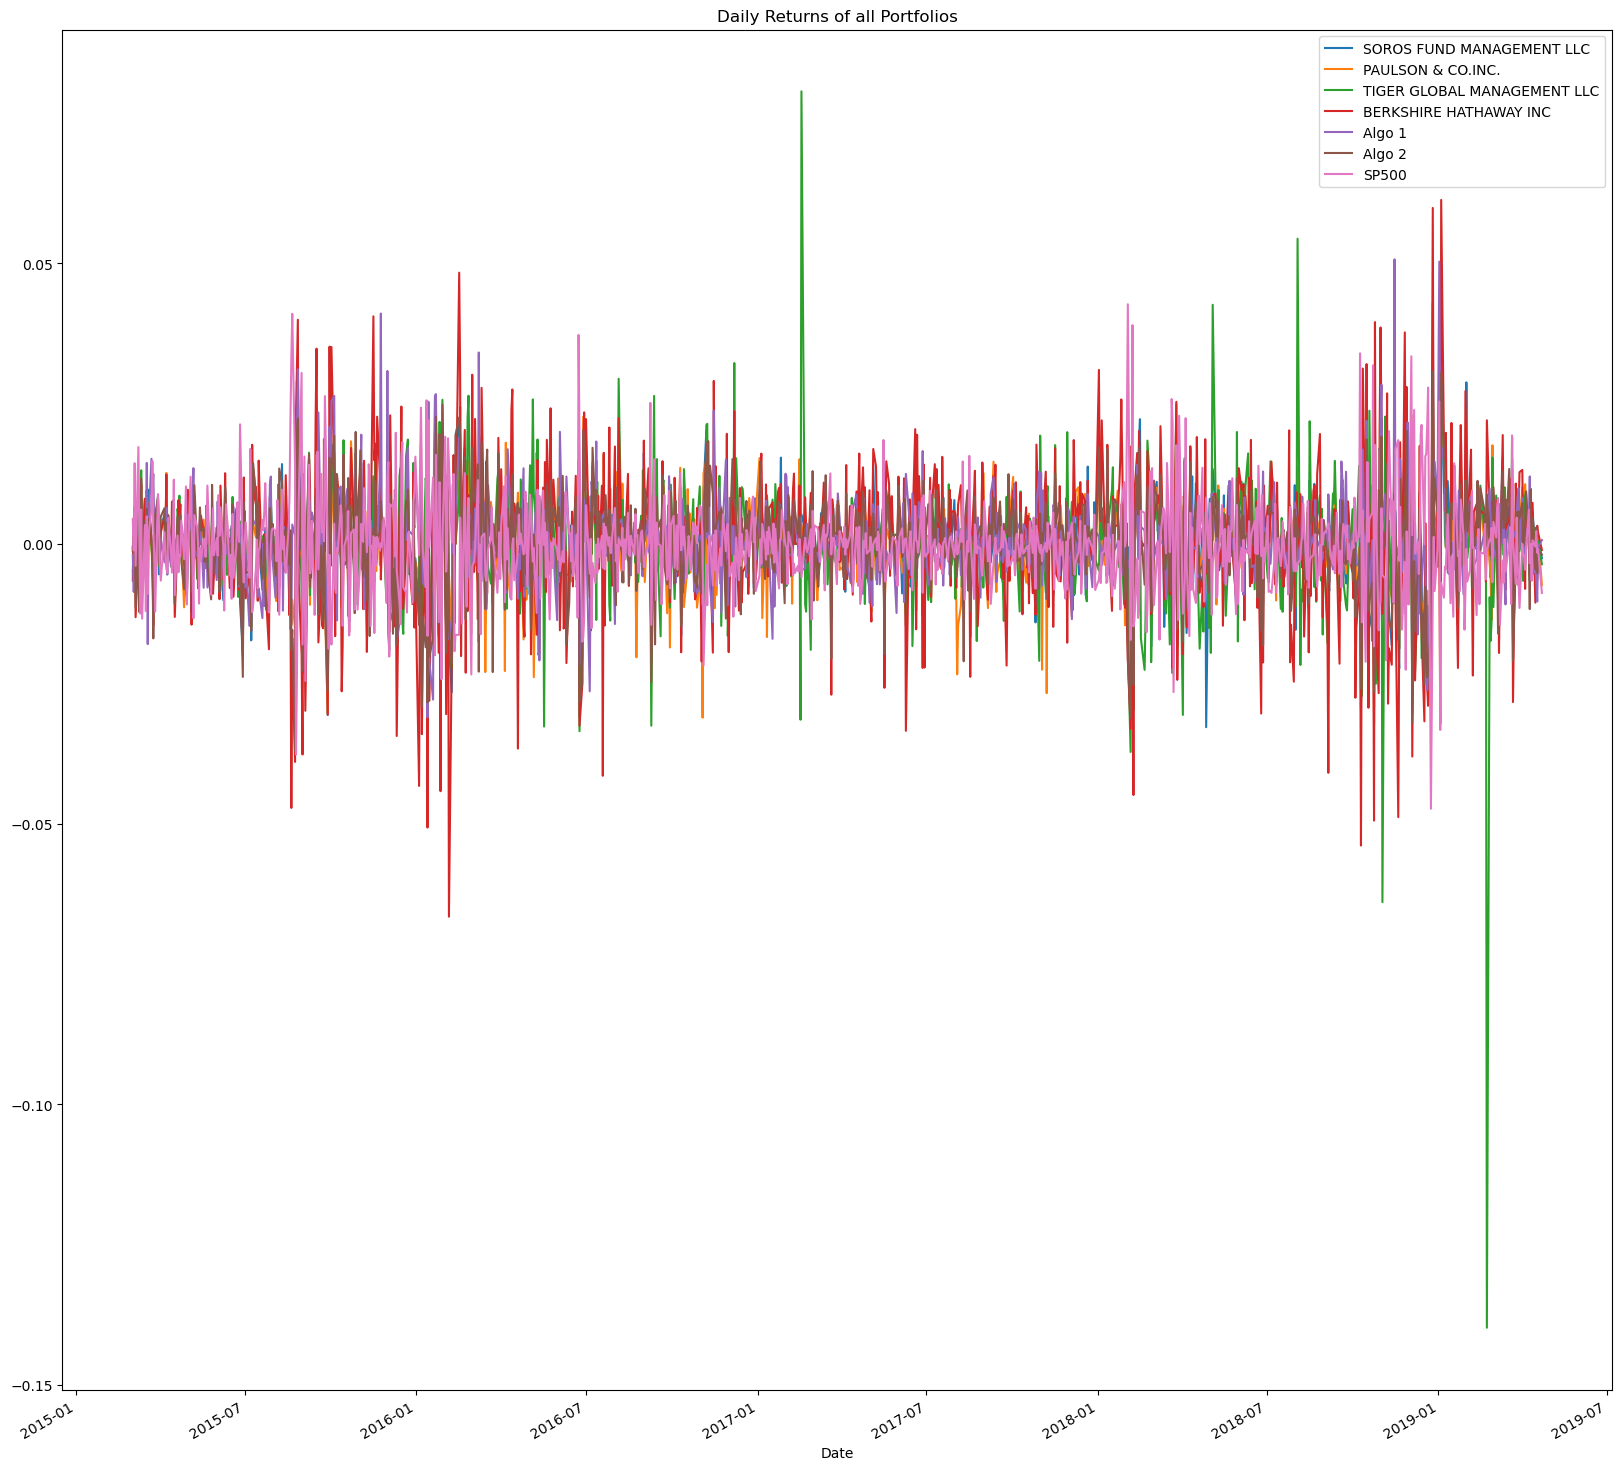

In [188]:
# Plot daily returns of all portfolios
all_returns.plot(figsize=(20,20), title="Daily Returns of all Portfolios")

#### Calculate and Plot cumulative returns.

<Axes: title={'center': 'Cumulative Returns of all Portfolios'}, xlabel='Date'>

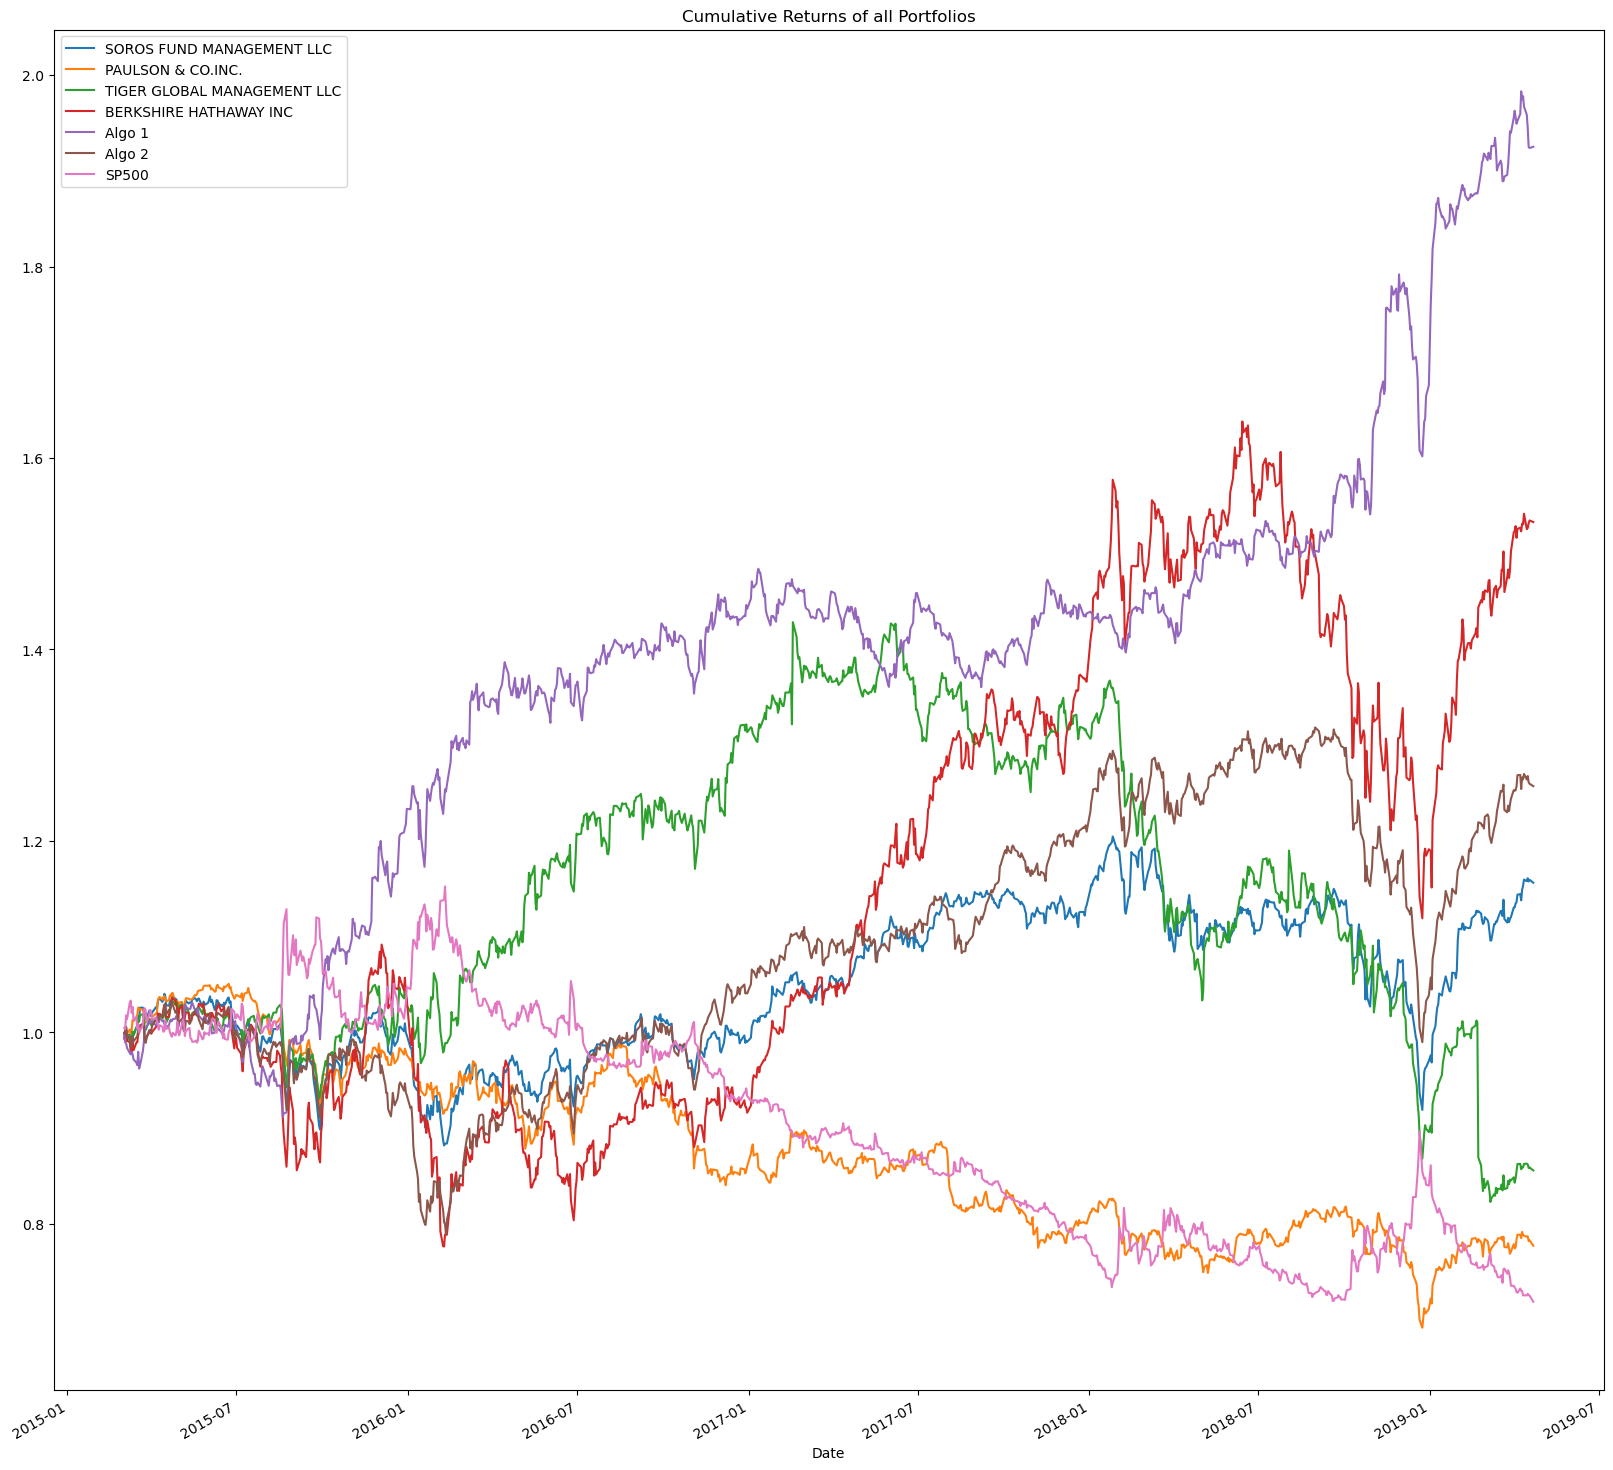

In [189]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + all_returns).cumprod()
# Plot cumulative returns
cumulative_returns.plot(figsize=(20,20), title="Cumulative Returns of all Portfolios")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


In [190]:
all_returns.columns

Index(['SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC. ',
       'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC', 'Algo 1',
       'Algo 2', 'SP500'],
      dtype='object')

<Axes: >

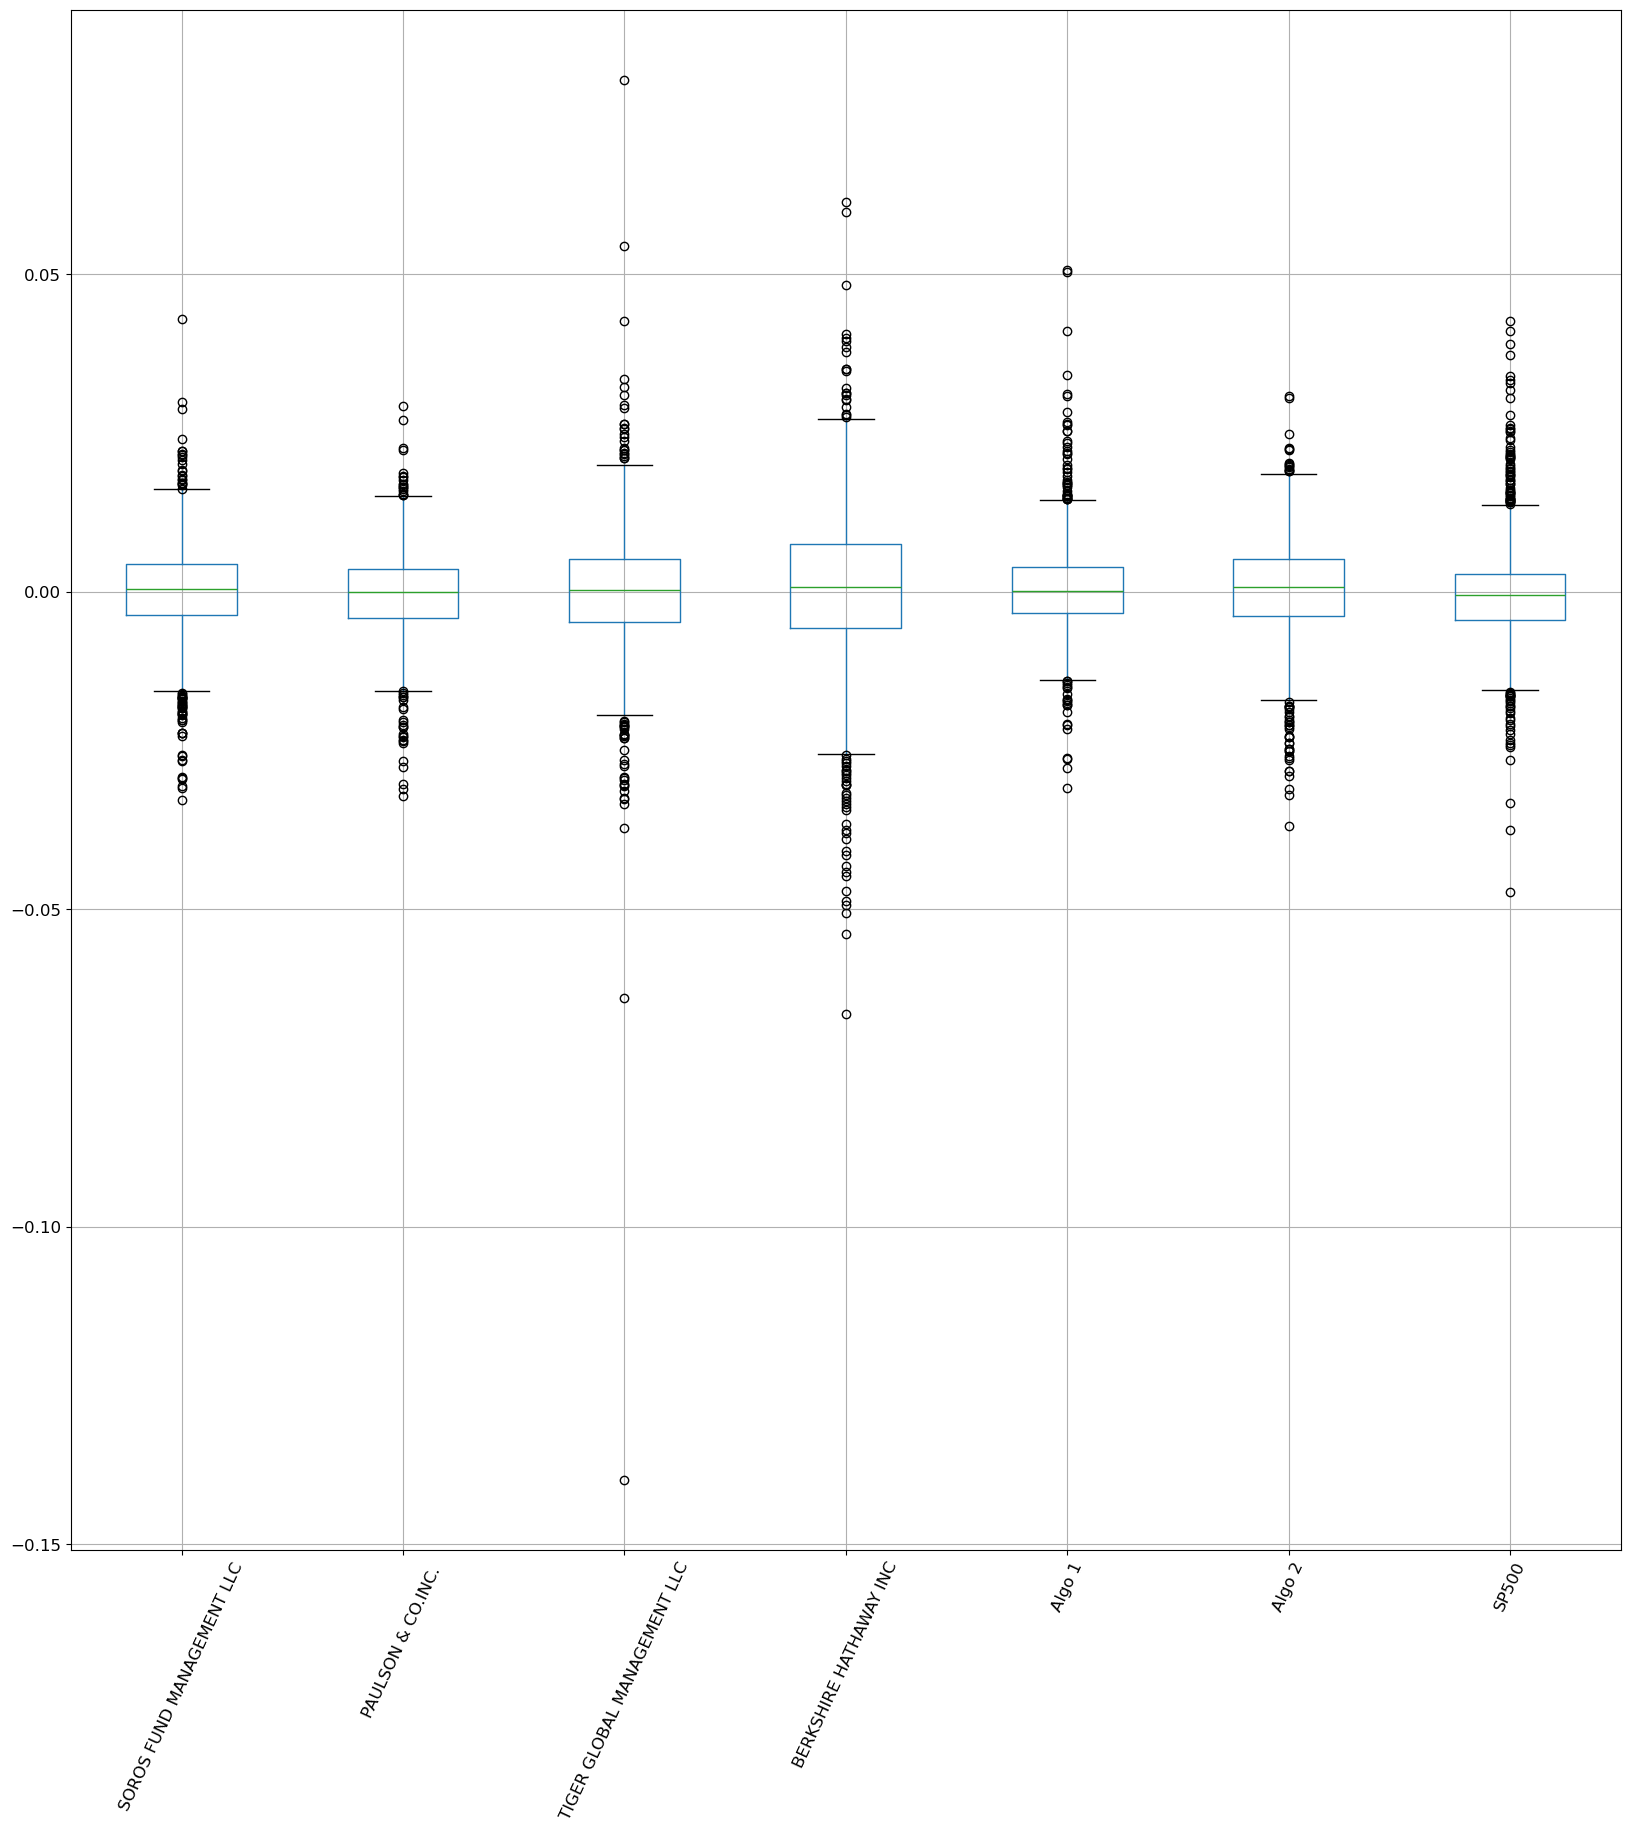

In [191]:
# Box plot to visually show risk

all_returns.boxplot(column=['SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC. ',
       'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC', 'Algo 1',
       'Algo 2', 'SP500'], figsize=(20,20), fontsize='large', rot=65)



### Calculate Standard Deviations

In [192]:
# Calculate the daily standard deviations of all portfolios
all_daily_std = all_returns.std()
all_daily_std.sort_values()

PAULSON & CO.INC.              0.007026
Algo 1                         0.007623
SOROS FUND MANAGEMENT LLC      0.007896
Algo 2                         0.008341
SP500                          0.008587
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [193]:
# Calculate  the daily standard deviation of S&P 500
sp500_daily_std = sp500_daily_returns.std()
# Determine which portfolios are riskier than the S&P 500
volatility = all_returns.std() * np.sqrt(252)
volatility.sort_values()

PAULSON & CO.INC.              0.111527
Algo 1                         0.121006
SOROS FUND MANAGEMENT LLC      0.125348
Algo 2                         0.132413
SP500                          0.136313
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
dtype: float64

Tiger Global Management LLC and Berkshire Hathaway Inc are more volatile and have a higher standard deviation, thus making these two portfolios riskier, yet may have greater returns, than S&P 500.

### Calculate the Annualized Standard Deviation

In [194]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = all_returns.std() * np.sqrt(252)
annualized_std.sort_values()

PAULSON & CO.INC.              0.111527
Algo 1                         0.121006
SOROS FUND MANAGEMENT LLC      0.125348
Algo 2                         0.132413
SP500                          0.136313
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<Axes: title={'center': 'Rolling 21 Day Standard Deviation'}, xlabel='Date'>

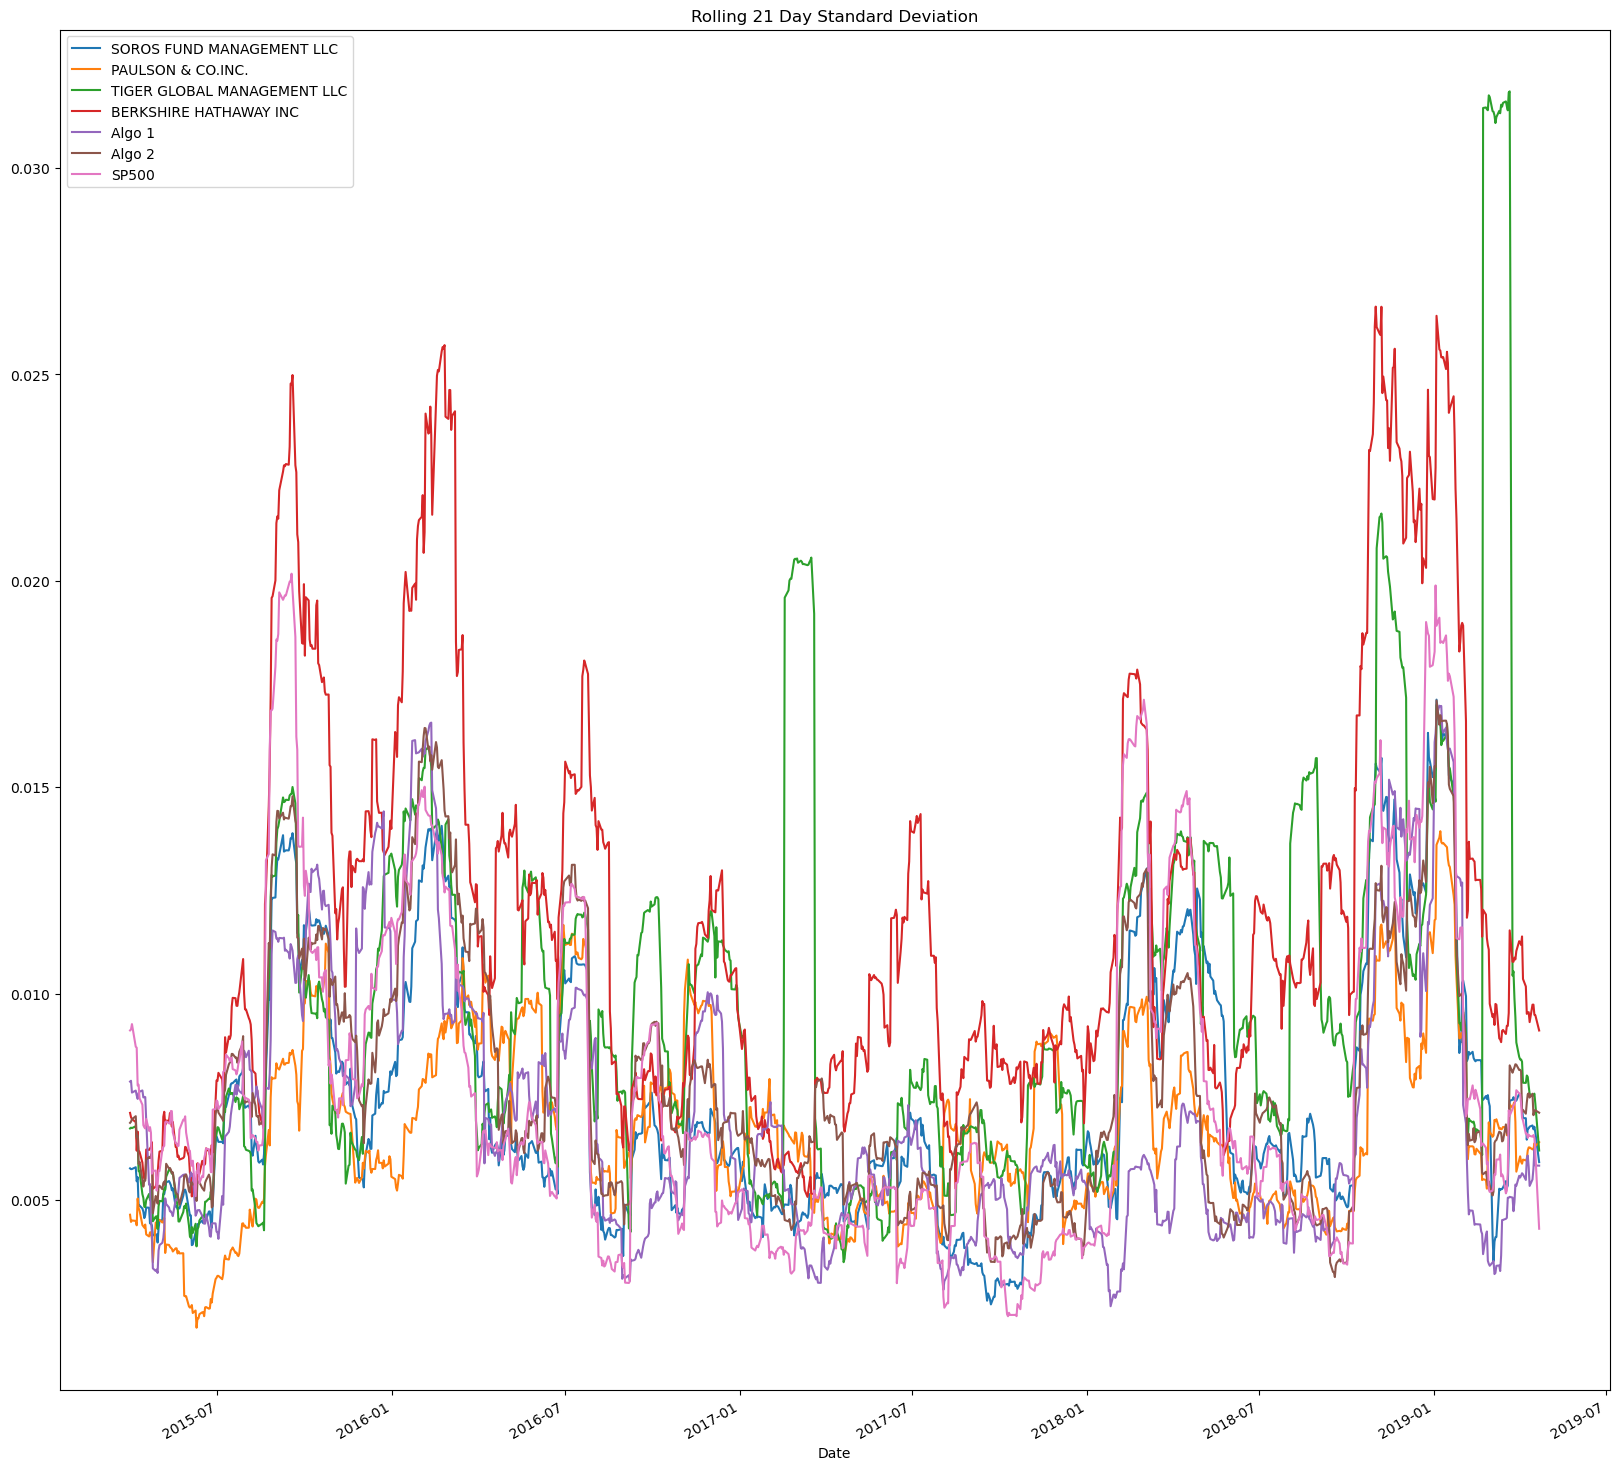

In [195]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_21_std = all_returns.rolling(window=21).std()
# Plot the rolling standard deviation
rolling_21_std.plot(title="Rolling 21 Day Standard Deviation", figsize=(20,20))

### Calculate and plot the correlation

<Axes: >

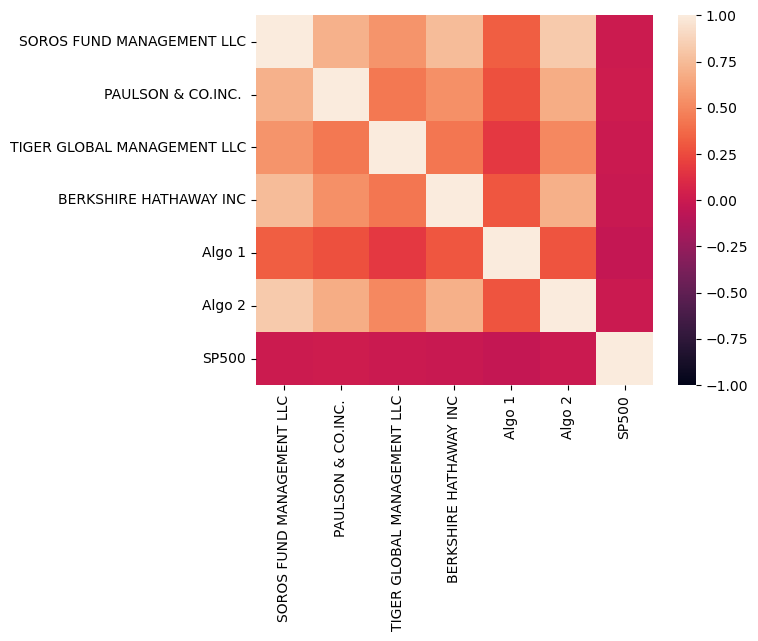

In [196]:
# Calculate the correlation
correlations = all_returns.corr()
correlations
# Display de correlation matrix
sns.heatmap(correlations, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

Berkshire Hathaway Beta: -0.020846489408902394


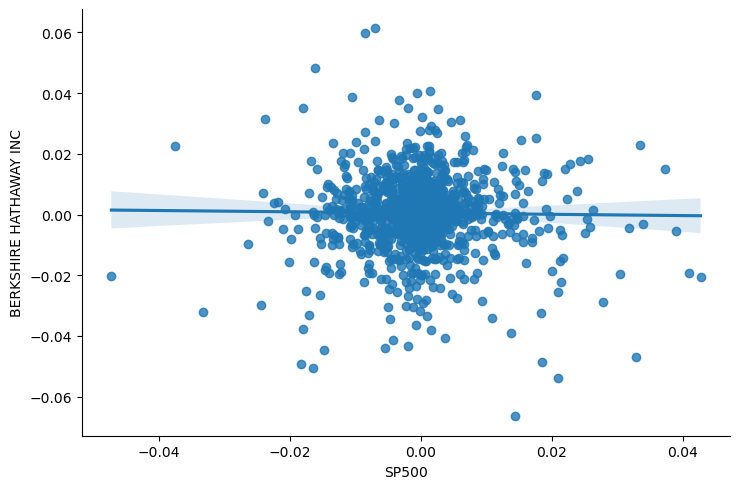

In [197]:
# Calculate covariance of a single portfolio
berkshire_hathaway_covariance = all_returns['BERKSHIRE HATHAWAY INC'].cov(all_returns['SP500'])
# Calculate variance of S&P 500
sp500_variance = all_returns['SP500'].var()
# Computing beta
berkshire_hathaway_beta = berkshire_hathaway_covariance / sp500_variance
print(f"Berkshire Hathaway Beta: {berkshire_hathaway_beta}")
# Plot beta trend
sns.lmplot(x='SP500', y='BERKSHIRE HATHAWAY INC', data=all_returns, aspect=1.5, fit_reg=True)


## Rolling Statistics Challenge: Exponentially Weighted Average (*NEED HELP*)

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<Axes: title={'center': 'Rolling Exponentially Weighted Average'}, xlabel='Date'>

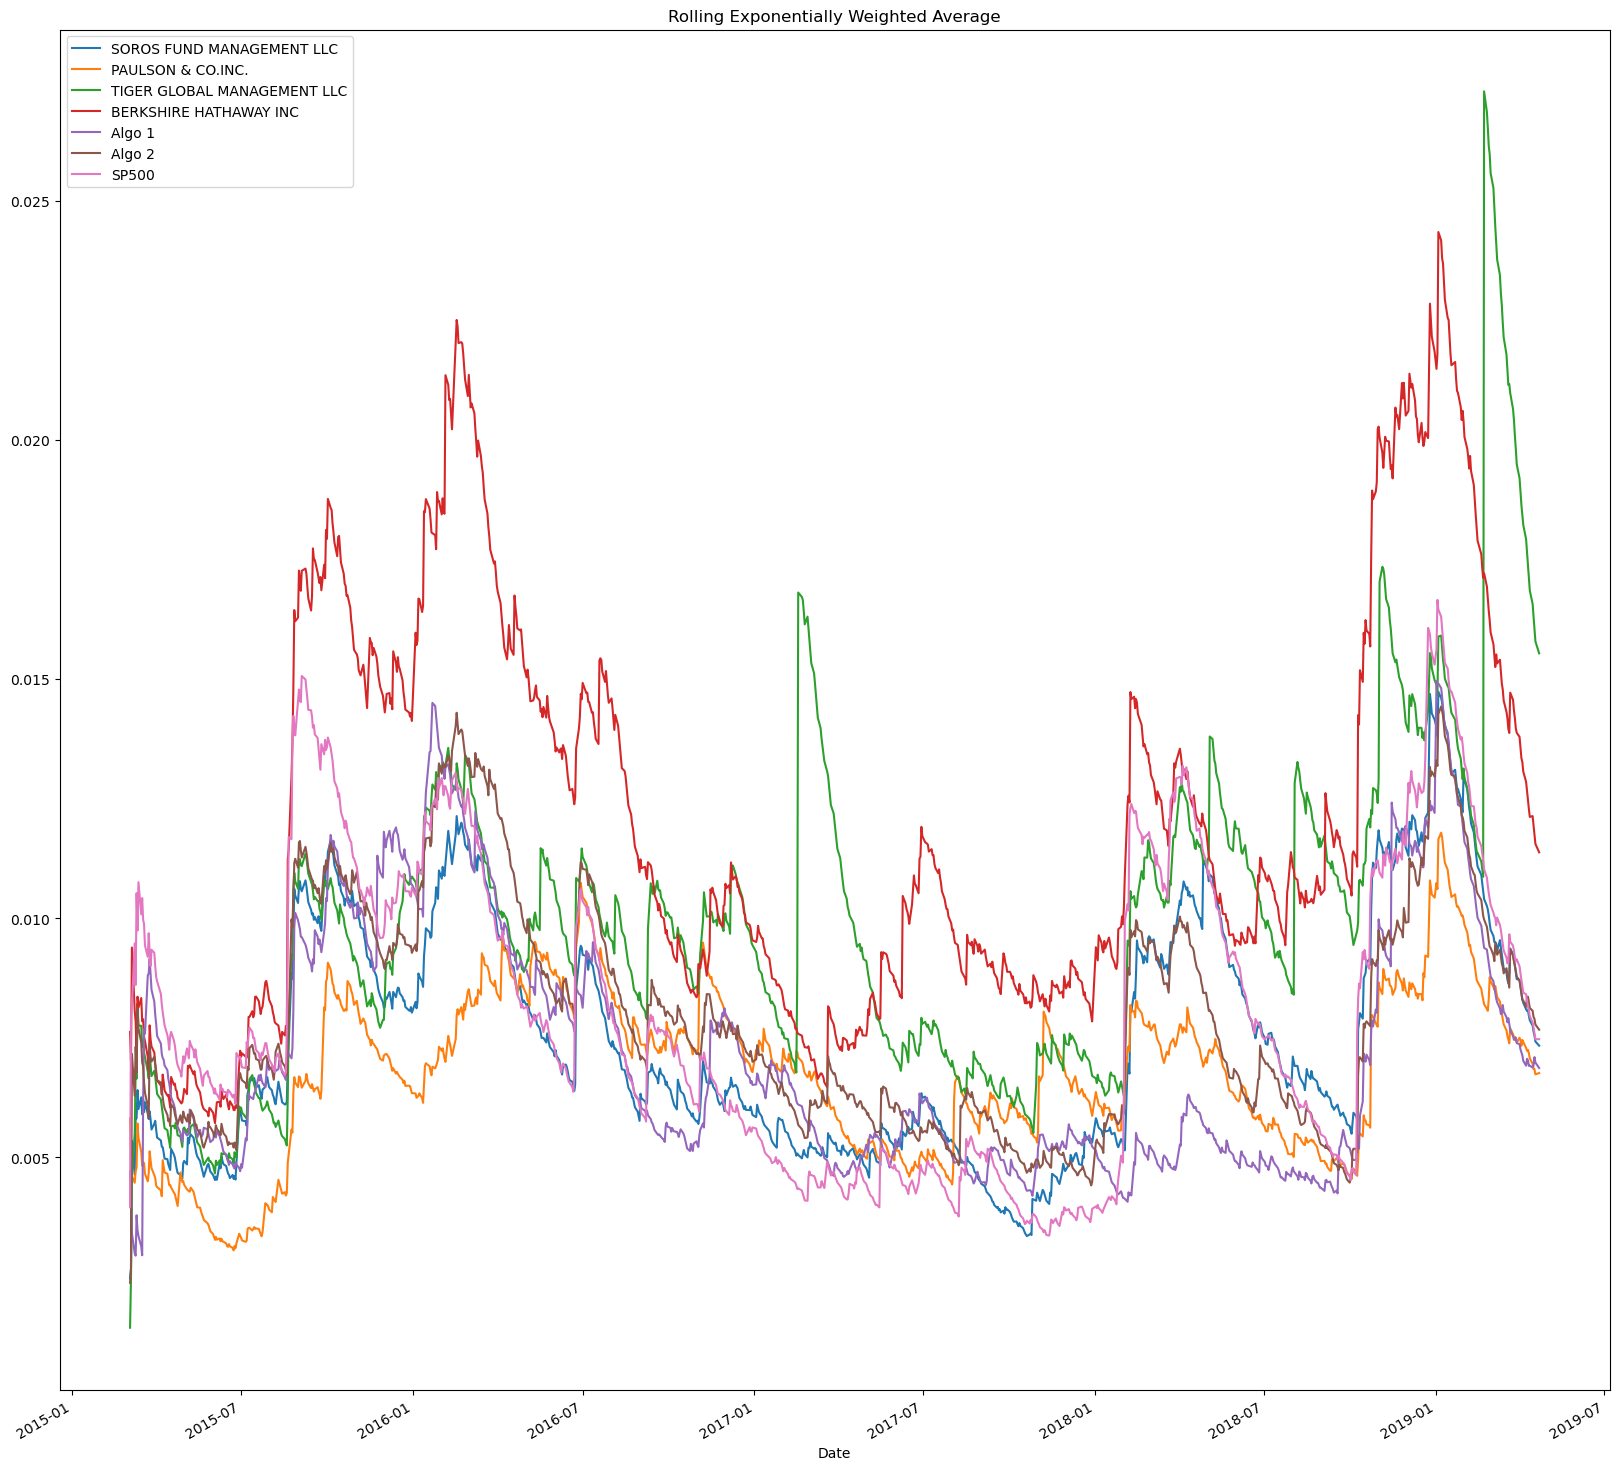

In [199]:
## Use `ewm` to calculate the rolling window

rolling_ewm = all_returns.ewm(halflife=21).std()
rolling_ewm.plot(figsize=(20,20), title="Rolling Exponentially Weighted Average")


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [200]:
# Annualized Sharpe Ratios
sharpe_ratio = (all_returns.mean() * 252) / (all_daily_std * np.sqrt(252))

<Axes: title={'center': 'Sharpe Ratios'}>

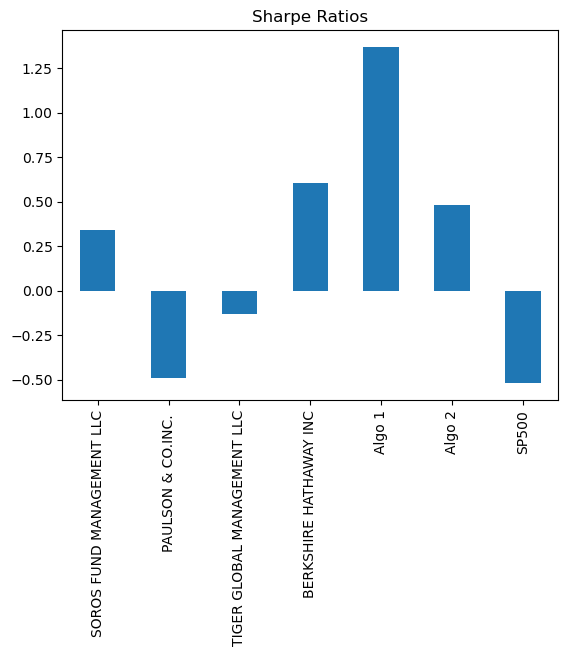

In [201]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot(kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Algorithm 1 outperformed S&P 500, as well as the whale portfolios. Algorithm 2 did perform better than S&P 500 and most of the whale portfolios, but was outperformed by Berkshire Hathaway's portfolio. Overall, Algorithm 1 was able to be less risky and proved to have higher returns than the whale portfolios and S&P500.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

*(Comments for reading data represent first attempt at creating csv through GOOGLEFINANCE, could not figure out how to print dates correctly when creating csv file, which gave me issues when using 'concat' to join dataframes. I ended up using the csv files(goog, aapl, cost) provided so I would be able to complete the assignment.)*

In [202]:
# Reading data from 1st stock
#disney_path = Path("Resources/disney_historical.csv")
#disney_df = pd.read_csv(disney_path, index_col='Date', parse_dates=True)
#disney_df.head()
goog_path = Path("Resources/goog_historical.csv")
goog_df = pd.read_csv(goog_path, index_col='Trade DATE', parse_dates=True)
goog_df.drop(columns = ['Symbol'], inplace=True)
goog_df.head()

,NOCP
Trade DATE,
2019-05-09,1162.38
2019-05-08,1166.27
2019-05-07,1174.10
2019-05-06,1189.39
2019-05-03,1185.40


In [203]:
# Reading data from 2nd stock
#fnlc_path = Path("Resources/fnlc_historical.csv")
#fnlc_df = pd.read_csv(fnlc_path, index_col='Date', parse_dates=True)
#fnlc_df.head()
aapl_path = Path("Resources/aapl_historical.csv")
aapl_df = pd.read_csv(aapl_path, index_col='Trade DATE', parse_dates=True)
aapl_df.drop(columns = ['Symbol'], inplace=True)
aapl_df.head()

,NOCP
Trade DATE,
2019-05-09,200.72
2019-05-08,202.90
2019-05-07,202.86
2019-05-06,208.48
2019-05-03,211.75


In [204]:
# Reading data from 3rd stock
#axon_path = Path("Resources/axon_historical.csv")
#axon_df = pd.read_csv(axon_path, index_col='Date', parse_dates=True)
#axon_df.head()
cost_path = Path("Resources/cost_historical.csv")
cost_df = pd.read_csv(cost_path, index_col='Trade DATE', parse_dates=True)
cost_df.drop(columns = ['Symbol'], inplace=True)
cost_df.head()

,NOCP
Trade DATE,
2019-05-09,243.47
2019-05-08,241.34
2019-05-07,240.18
2019-05-06,244.23
2019-05-03,244.62


In [205]:
# Reading data from 4th stock
#ford_path = Path("Resources/ford_historical.csv")
#ford_df = pd.read_csv(ford_path, index_col='Date', parse_dates=True)
#ford_df.head()

In [206]:
# Combine all stocks in a single DataFrame
#my_portfolio = pd.concat([disney_df, fnlc_df, axon_df, ford_df], axis="columns", join="inner")
#my_portfolio.head()
my_portfolio = pd.concat([goog_df, aapl_df, cost_df], axis="columns", join="inner")
my_portfolio.head()

,NOCP,NOCP,NOCP
Trade DATE,,,
2019-05-09,1162.38,200.72,243.47
2019-05-08,1166.27,202.90,241.34
2019-05-07,1174.10,202.86,240.18
2019-05-06,1189.39,208.48,244.23
2019-05-03,1185.40,211.75,244.62


In [207]:
# Reset Date index
my_portfolio.reset_index("Trade DATE")
my_portfolio.sort_index()
my_portfolio

,NOCP,NOCP,NOCP
Trade DATE,,,
2019-05-09,1162.38,200.72,243.47
2019-05-08,1166.27,202.90,241.34
2019-05-07,1174.10,202.86,240.18
2019-05-06,1189.39,208.48,244.23
2019-05-03,1185.40,211.75,244.62
...,...,...,...
2018-05-17,1078.59,186.99,199.60
2018-05-16,1081.77,188.18,198.71
2018-05-15,1079.23,186.44,195.48


In [208]:
# Reorganize portfolio data by having a column per symbol
#columns = ["Disney", "The First Bancorp, Inc", "Axon", "Ford"]
#my_portfolio.columns = columns
#my_portfolio.head()
columns = ["GOOG", "AAPL", "COST"]
my_portfolio.columns = columns
my_portfolio.head()

,GOOG,AAPL,COST
Trade DATE,,,
2019-05-09,1162.38,200.72,243.47
2019-05-08,1166.27,202.90,241.34
2019-05-07,1174.10,202.86,240.18
2019-05-06,1189.39,208.48,244.23
2019-05-03,1185.40,211.75,244.62


In [209]:
# Calculate daily returns
my_returns = my_portfolio.pct_change()
# Drop NAs
my_returns = my_portfolio.pct_change().dropna()
# Display sample data
my_returns.head()

,GOOG,AAPL,COST
Trade DATE,,,
2019-05-08,0.003347,0.010861,-0.008749
2019-05-07,0.006714,-0.000197,-0.004806
2019-05-06,0.013023,0.027704,0.016862
2019-05-03,-0.003355,0.015685,0.001597
2019-05-02,-0.019226,-0.012279,-0.007890


In [210]:
# Checking for nulls
my_returns.isnull().sum()

GOOG    0
AAPL    0
COST    0
dtype: int64

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [211]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
my_portfolio_returns = my_returns.dot(weights)
# Display sample data
my_portfolio_returns.head()

Trade DATE
2019-05-08    0.001820
2019-05-07    0.000570
2019-05-06    0.019196
2019-05-03    0.004642
2019-05-02   -0.013131
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [212]:
# Join your returns DataFrame to the original returns DataFrame
joined_df = pd.concat([my_portfolio_returns, all_returns], axis="columns", join="inner")
joined_df.head()

,0,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
2019-04-22,-0.011812,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,-0.008764
2019-04-18,-0.001148,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,-0.001011
2019-04-17,-0.001541,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577
2019-04-16,-0.009149,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-15,-0.000326,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509


In [213]:
joined_df.columns

Index([                            0,   'SOROS FUND MANAGEMENT LLC',
                'PAULSON & CO.INC. ', 'TIGER GLOBAL MANAGEMENT LLC',
            'BERKSHIRE HATHAWAY INC',                      'Algo 1',
                            'Algo 2',                       'SP500'],
      dtype='object')

In [214]:
# Rename columns
columns = ['MY PORTFOLIO', 'SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC.', 'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC', 'ALGO 1', 'ALGO 2', 'SP500']
joined_df.columns = columns
joined_df.head()

,MY PORTFOLIO,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,ALGO 1,ALGO 2,SP500
2019-04-22,-0.011812,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,-0.008764
2019-04-18,-0.001148,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,-0.001011
2019-04-17,-0.001541,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577
2019-04-16,-0.009149,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-15,-0.000326,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509


In [215]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
joined_df.dropna()

,MY PORTFOLIO,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,ALGO 1,ALGO 2,SP500
2019-04-22,-0.011812,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,-0.008764
2019-04-18,-0.001148,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,-0.001011
2019-04-17,-0.001541,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577
2019-04-16,-0.009149,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-15,-0.000326,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509
...,...,...,...,...,...,...,...,...
2018-05-17,0.006112,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,0.002639
2018-05-16,0.001618,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.000857
2018-05-15,-0.009283,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.004044
2018-05-14,0.010216,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.006889


In [216]:
# checking for nulls
joined_df.isnull().sum()

MY PORTFOLIO                   0
SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
ALGO 1                         0
ALGO 2                         0
SP500                          0
dtype: int64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [217]:
# calculating 'std'
joined_df_std = joined_df.std()
joined_df_std.sort_values()

PAULSON & CO.INC.              0.007350
ALGO 1                         0.008419
ALGO 2                         0.008769
SOROS FUND MANAGEMENT LLC      0.009234
SP500                          0.009584
MY PORTFOLIO                   0.013426
TIGER GLOBAL MANAGEMENT LLC    0.014642
BERKSHIRE HATHAWAY INC         0.015548
dtype: float64

In [218]:
# Calculate the annualized `std`
annualized_std = joined_df.std()* np.sqrt(252)
annualized_std.sort_values()

PAULSON & CO.INC.              0.116683
ALGO 1                         0.133645
ALGO 2                         0.139204
SOROS FUND MANAGEMENT LLC      0.146589
SP500                          0.152147
MY PORTFOLIO                   0.213137
TIGER GLOBAL MANAGEMENT LLC    0.232434
BERKSHIRE HATHAWAY INC         0.246819
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<Axes: title={'center': 'Rolling 21-Day Standard Deviation of My Portfolio'}>

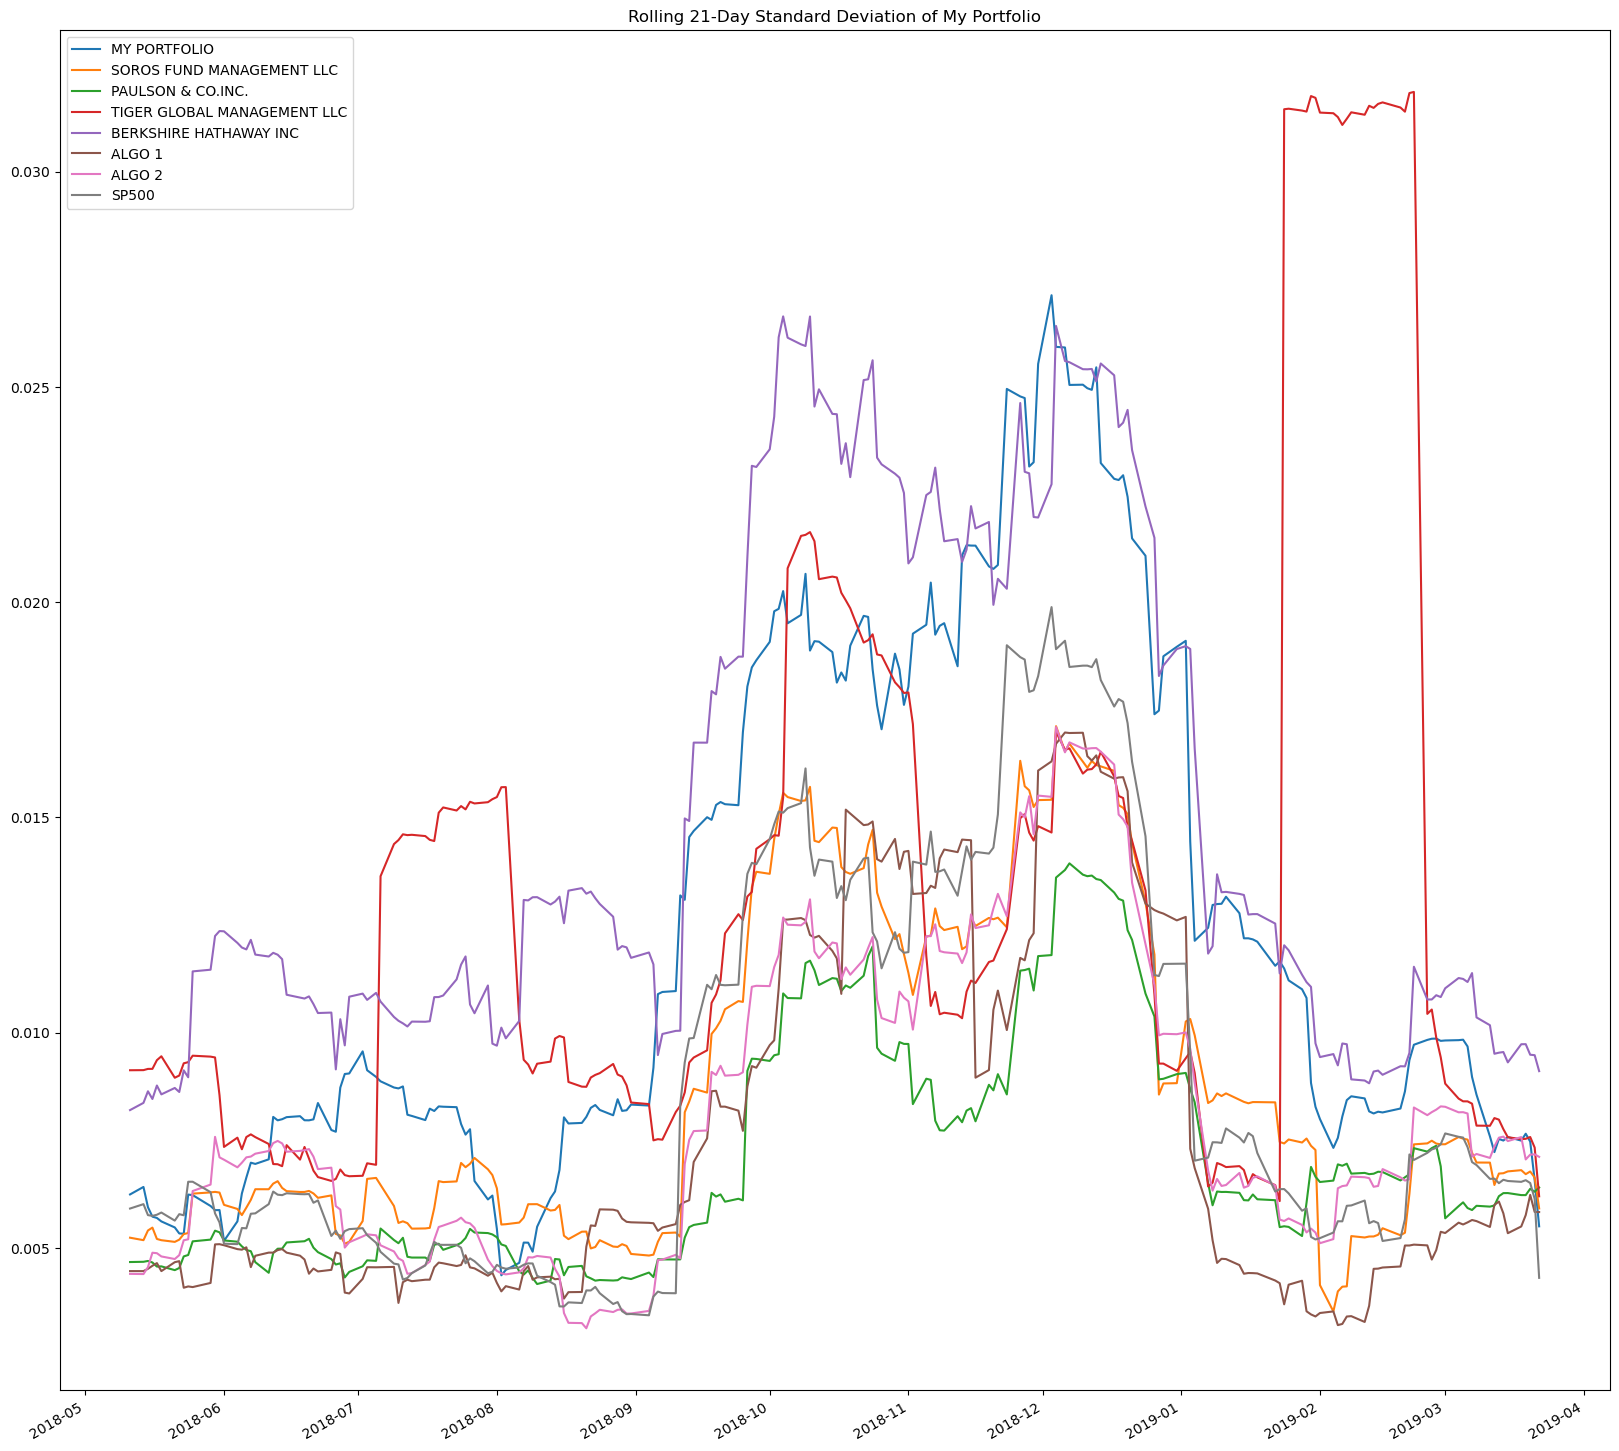

In [219]:
# Calculate rolling standard deviation
rolling_std = joined_df.rolling(window=21).std()
# Plot rolling standard deviation
rolling_std.plot(figsize=(20,20), title='Rolling 21-Day Standard Deviation of My Portfolio')

### Calculate and plot the correlation

<Axes: >

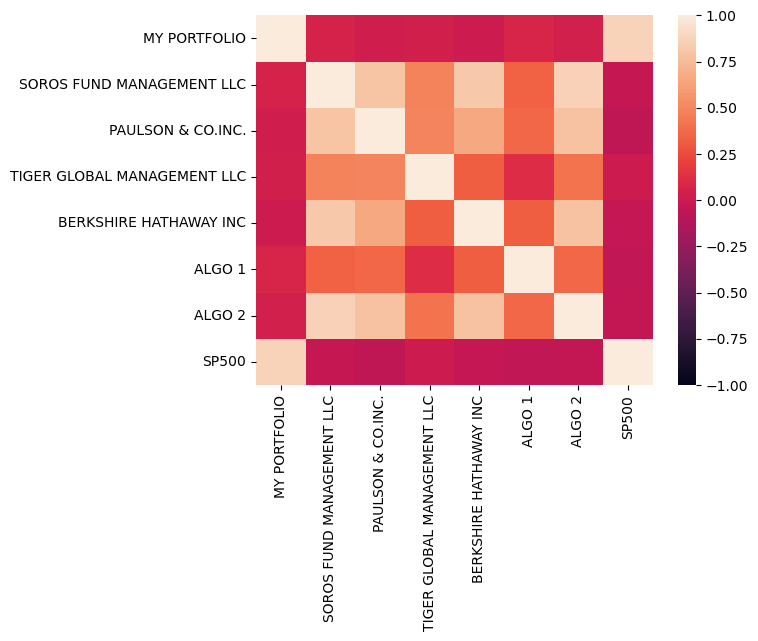

In [220]:
# Calculate and plot the correlation
correlation_all = joined_df.corr()
sns.heatmap(correlation_all, vmin=-1, vmax=1)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<Axes: title={'center': 'Rolling 60-Day Beta of My Portfolio'}>

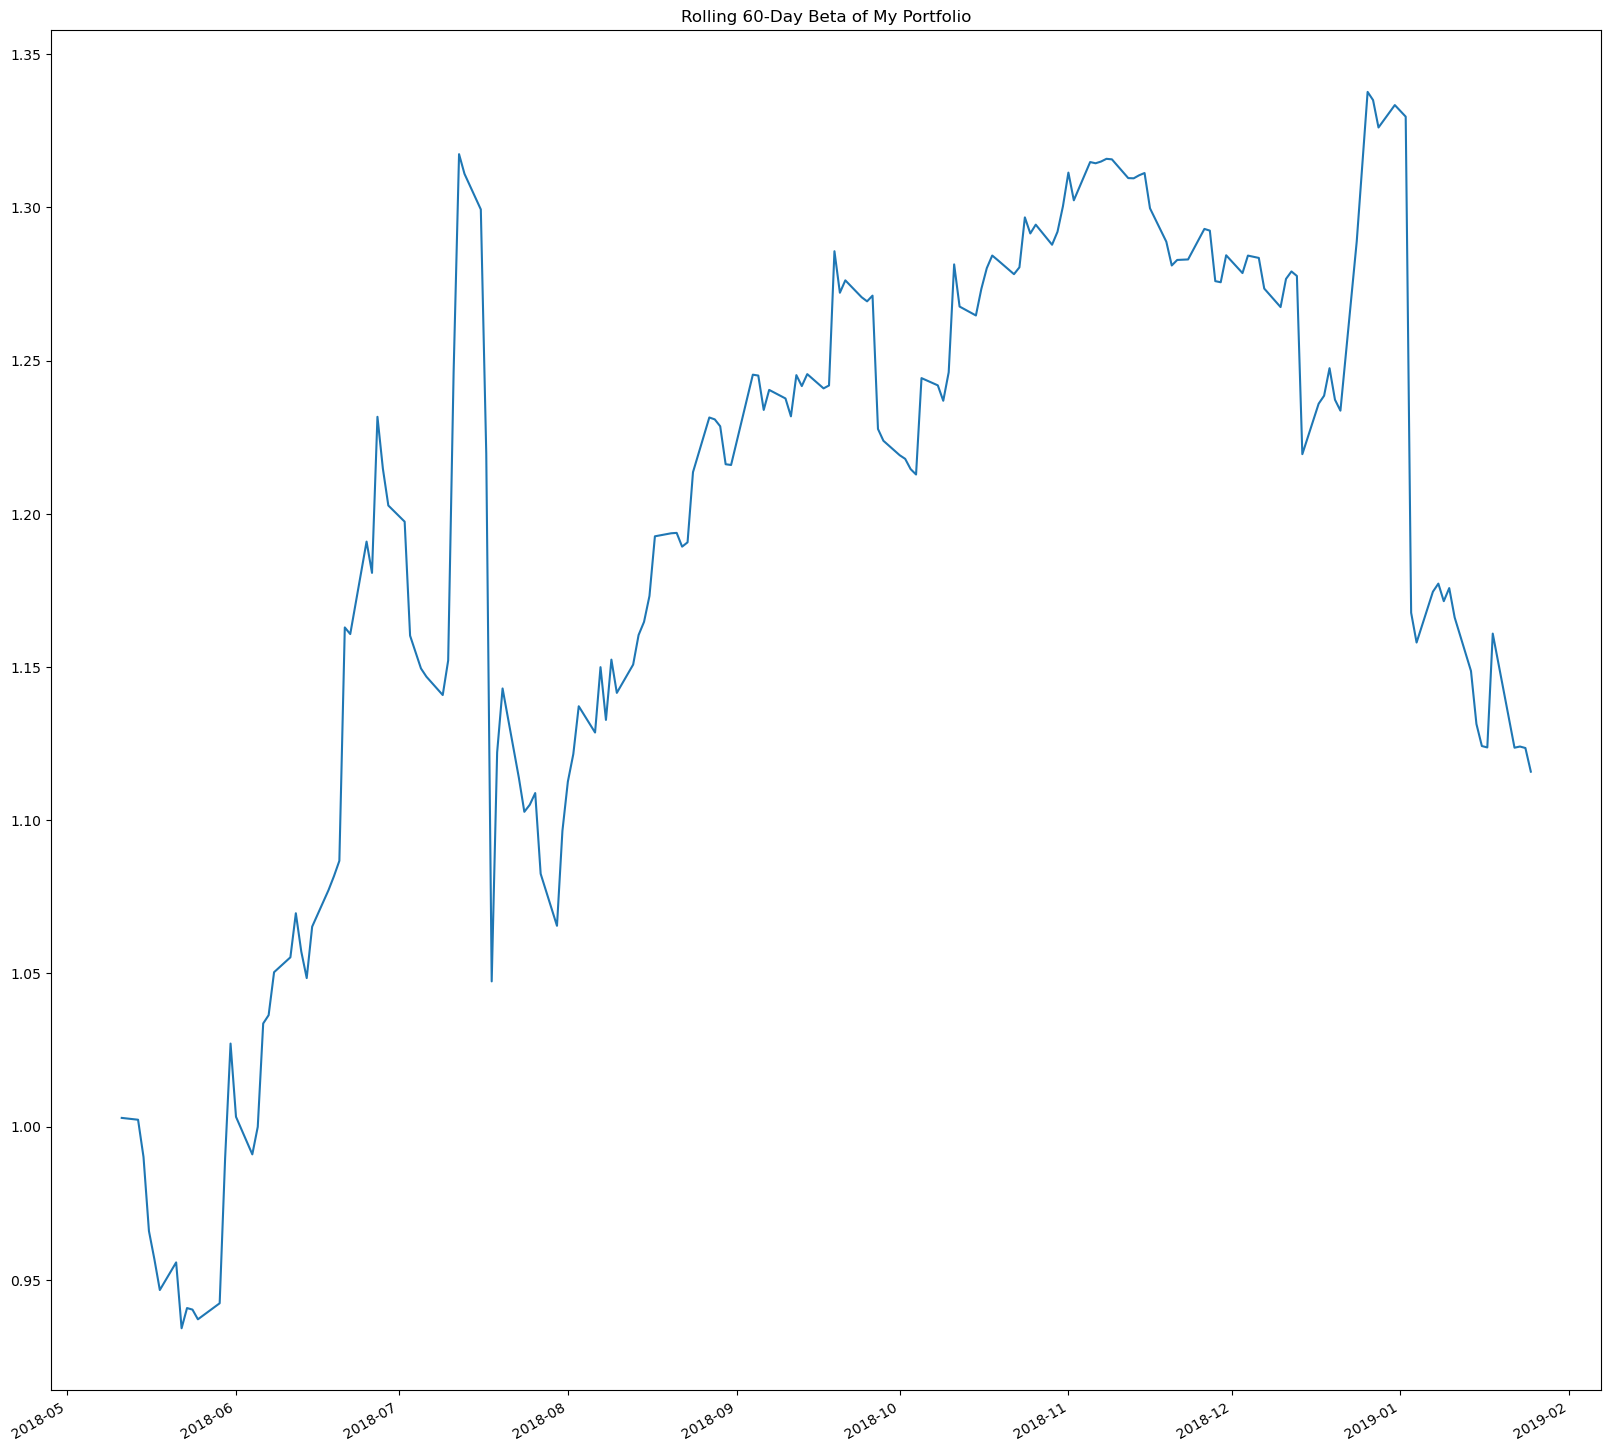

In [221]:
# Calculate and plot Beta
covariance = joined_df["MY PORTFOLIO"].cov(joined_df["SP500"])
variance = joined_df["SP500"].var()
beta = covariance / variance
rolling_covariance = joined_df["MY PORTFOLIO"].rolling(window=60).cov(joined_df["SP500"])
rolling_variance = joined_df["SP500"].rolling(window=60).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 20), title='Rolling 60-Day Beta of My Portfolio')

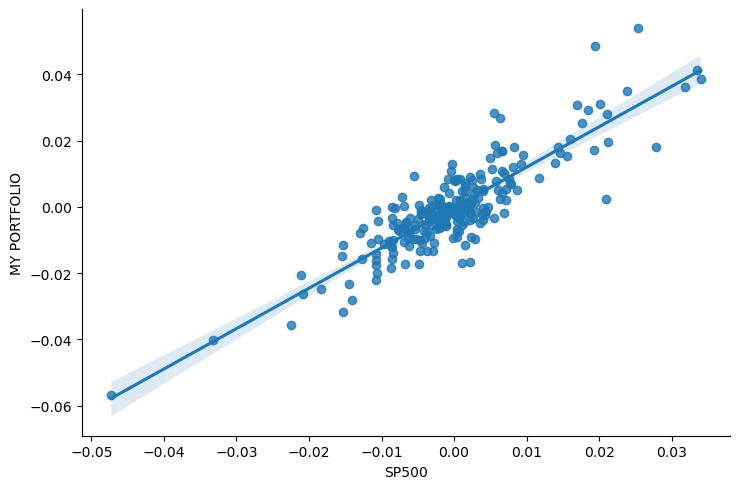

In [222]:
# Beta Trend Plotted
sns.lmplot(x='SP500', y='MY PORTFOLIO', data=joined_df, aspect=1.5, fit_reg=True)

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [223]:
# Calculate Annualized Sharpe Ratios
my_sharpe_ratio = (joined_df.mean() * 252) / (annualized_std)
my_sharpe_ratio

MY PORTFOLIO                  -0.613547
SOROS FUND MANAGEMENT LLC      0.344766
PAULSON & CO.INC.              0.236041
TIGER GLOBAL MANAGEMENT LLC   -1.052249
BERKSHIRE HATHAWAY INC         0.085005
ALGO 1                         1.999866
ALGO 2                         0.009467
SP500                         -0.432942
dtype: float64

<Axes: title={'center': 'Sharpe Ratios of My Portfolio'}>

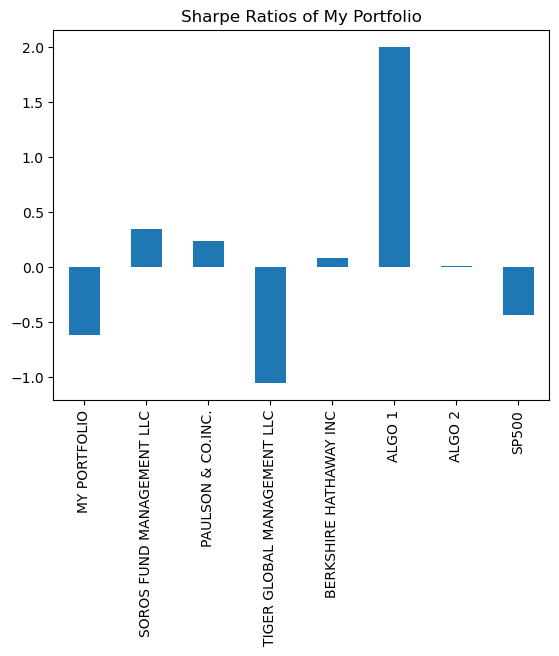

In [224]:
# Visualize the sharpe ratios as a bar plot
my_sharpe_ratio.plot(kind="bar", title="Sharpe Ratios of My Portfolio")

### How does your portfolio do?

My portfolio performed very similarily to SP500, yet SP500 outperformed my protfolio slightly. My portfolio did however outperform Tiger Global Management LLC. I would've liked to see how my original portfolio of my chosen stock would have performed, but difficulties extracting the data from Googlefinance prevented me from doing so. The dates for my csv files were formatted differently than the csv files of the whale portfolios, algorithms, and S&P500. I tried multiple methods to edit the data but was not able to do it correctly. Overall, my portfolio fell second to last when compared to all portfolios, having a positive correlation to SP500.